## Importando as bibliotecas e o dataset

In [271]:
import pandas as pd
import seaborn as sns
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score,confusion_matrix,recall_score



In [272]:
#Importando a dataset
df = pd.read_csv("train.csv",low_memory=False)

## Data Inspection and Previous Exploratory Data Analysis  

In [273]:
#Observando dimensões do dataset
df.shape

print(f"Qtd. linhas: {df.shape[0]} \nQtd. colunas: {df.shape[1]}")

Qtd. linhas: 100000 
Qtd. colunas: 28


In [274]:
#Obtendo informações gerais do dataset (Colunas com valores não nulos e tipos de dados)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

##### OBS: É possível visualizar que existem campos com valores nulos e alguns com tipos de dados trocados. 
##### Ex: Age é um dado inteiro, porém está como string (comumente presentado como "object" no pandas). 


In [275]:
#Explorando melhor os valores nulos
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

##### Alguns dos valores nulos fazem sentido não terem dados, como: Salário base da pessoa (pode ser desempregada), tipo de empréstimo (a pessoa pode não ter pego empréstimo), média de pagamentos atrasados (pode ser que sempre pague sem atrasos) e quantidade investida (pode não ter investimentos)

In [276]:
#Verificando a presença de dados duplicados 
df_verifing_duplicated = df.copy()
df_verifing_duplicated = df_verifing_duplicated.drop(columns=['ID'])

duplicados = df_verifing_duplicated.duplicated().sum()
duplicados

0

##### O dataset não possui duplicatas.

##### OBS: Foi removido o ID (primary key) da tabela para que apenas os dados dos clientes fossem analisados.

In [277]:
#Avaliando as regras de negócio das colunas do tipo string e variação das colunas numéricas
col = df.columns

print("----GROUPBY SECTION----")
for c in col:
    
    print(f'COLUNA: {c}')
    print(df.groupby([f'{c}'])[f'{c}'].count())
    print("\n\n")
   

print("----DESCRIBE SECTION----")
for c in col:
    
    print(f'COLUNA: {c}')
    print(df[f'{c}'].describe())
    print("\n\n")


----GROUPBY SECTION----
COLUNA: ID
ID
0x10002    1
0x10003    1
0x10004    1
0x10005    1
0x10006    1
          ..
0xfff9     1
0xfffa     1
0xfffb     1
0xfffc     1
0xfffd     1
Name: ID, Length: 100000, dtype: int64



COLUNA: Customer_ID
Customer_ID
CUS_0x1000    8
CUS_0x1009    8
CUS_0x100b    8
CUS_0x1011    8
CUS_0x1013    8
             ..
CUS_0xff3     8
CUS_0xff4     8
CUS_0xff6     8
CUS_0xffc     8
CUS_0xffd     8
Name: Customer_ID, Length: 12500, dtype: int64



COLUNA: Month
Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64



COLUNA: Name
Name
 Mattr       7
 Mattx       6
 Stevei      7
 Stevep      8
 Thomasf     7
            ..
tg           8
ty           8
yi          14
yk           8
yv          15
Name: Name, Length: 10139, dtype: int64



COLUNA: Age
Age
-500    886
100       1
1004      1
1006      1
1010      1
       ... 
989       1


Credit_History_Age
0 Years and 1 Months       2
0 Years and 10 Months     79
0 Years and 11 Months     77
0 Years and 2 Months      15
0 Years and 3 Months      20
                        ... 
9 Years and 5 Months     246
9 Years and 6 Months     212
9 Years and 7 Months     219
9 Years and 8 Months     251
9 Years and 9 Months     261
Name: Credit_History_Age, Length: 404, dtype: int64



COLUNA: Payment_of_Min_Amount
Payment_of_Min_Amount
NM     12007
No     35667
Yes    52326
Name: Payment_of_Min_Amount, dtype: int64



COLUNA: Total_EMI_per_month
Total_EMI_per_month
0.000000        10613
4.462837            8
4.713184            8
4.865690            8
4.916139            8
                ...  
82193.000000        1
82204.000000        1
82236.000000        1
82256.000000        1
82331.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64



COLUNA: Amount_invested_monthly
Amount_invested_monthly
0.0                    169
10.010194262612963       1
10.0114247950

##### Como previamente observado, alguns campos numéricos estão como string. Existem dados como string poluindo os dados numéricos que precisam ser tratados.

#### OBS: O erro na tentativa de conversão a seguir apresenta esse problema na coluna Monthly_Balance

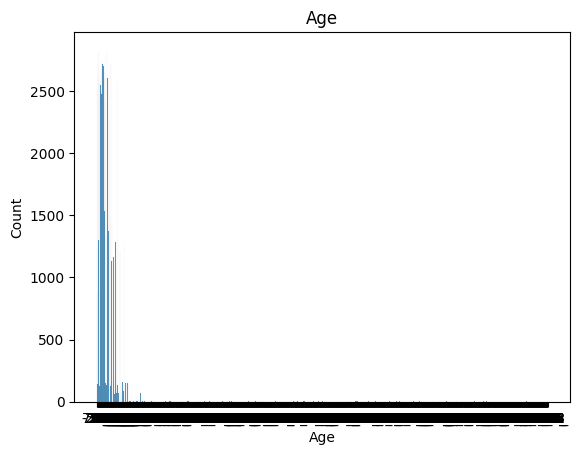

In [278]:
#Plotando histogramas para avaliar a distribuição

"""columns = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date',
            'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month',
            'Amount_invested_monthly','Monthly_Balance']"""


columns = ['Age']
for col in columns:
    sns.histplot(data=df,x=col, bins=20)
    plt.title(f'{col}')
    plt.show()



##### OBS: É possível observar que as colunas que estão como string não apresentam o histograma corretamente, por esse motivo será necessário realizar um tratamento prévio para continuar a exploração dos dados

In [279]:
#Realizando cópia da base original para mante-la inalterada
df_pre_trat = df.copy()

#Tratando coluna Age
df_pre_trat['Age'] = df_pre_trat['Age'].apply(lambda x: x.replace('_','')) #Existem dados numéricos com underscore, por isso foi necessária a sua remoção para converter Age de string para inteiro
df_pre_trat['Age'] = df_pre_trat['Age'].apply(lambda x: int(x))

#Aplicando a ideia de tratamento de dados da coluna Age para as demais

columns = ['Annual_Income','Monthly_Inhand_Salary','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date',
            'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month',
            'Amount_invested_monthly','Monthly_Balance']

for col in columns:

    t = str(type(df_pre_trat[f'{col}'].values[0]))

    if t == "<class 'str'>":

        df_pre_trat[f'{col}'] = df_pre_trat[f'{col}'].astype(str)

        df_pre_trat[f'{col}'] = df_pre_trat[f'{col}'].apply(lambda x: x.replace('_', '') if isinstance(x, str) else x) 

        df_pre_trat[f'{col}'] = df_pre_trat[f'{col}'].apply(lambda x: None if x == '' else x)

        df_pre_trat[f'{col}'] = df_pre_trat[f'{col}'].apply(lambda x: float(x) if isinstance(x, str) and x != 'None' else x)



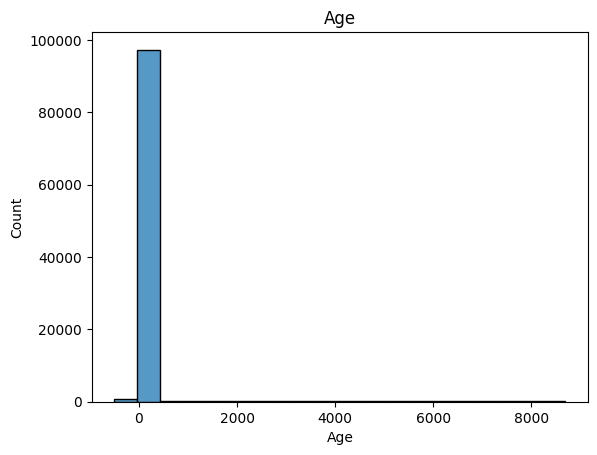

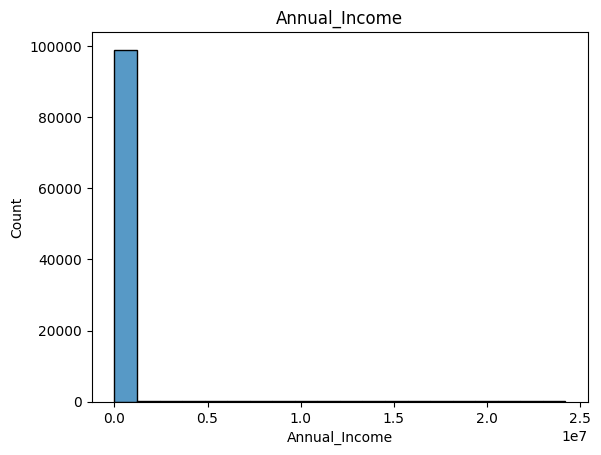

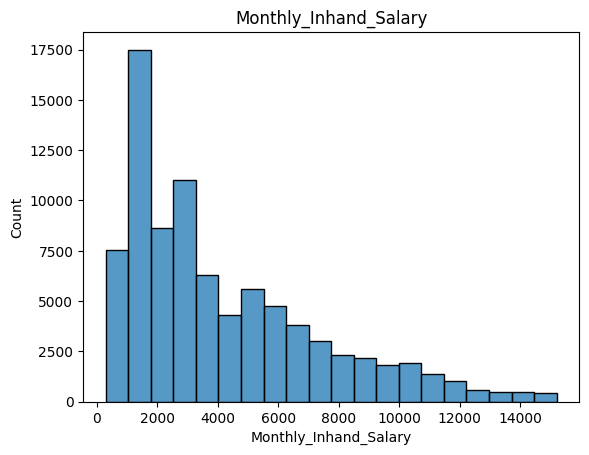

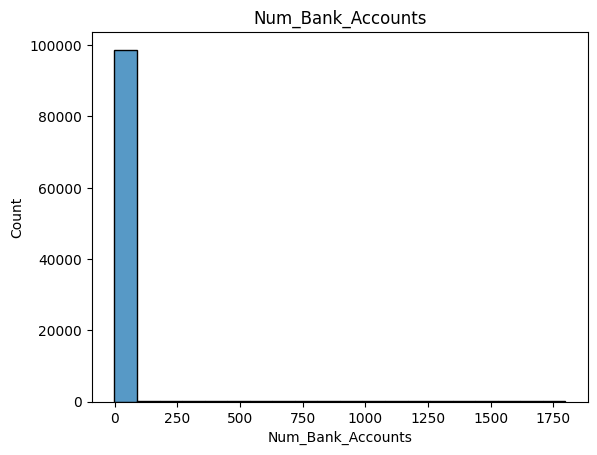

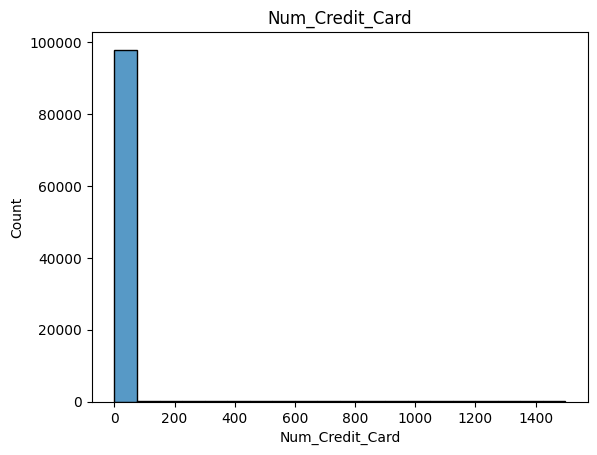

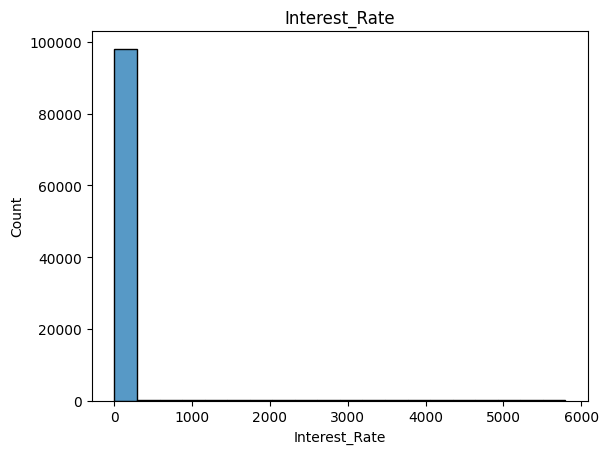

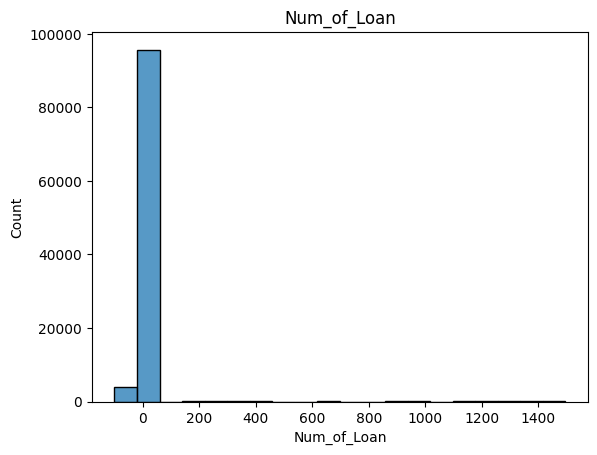

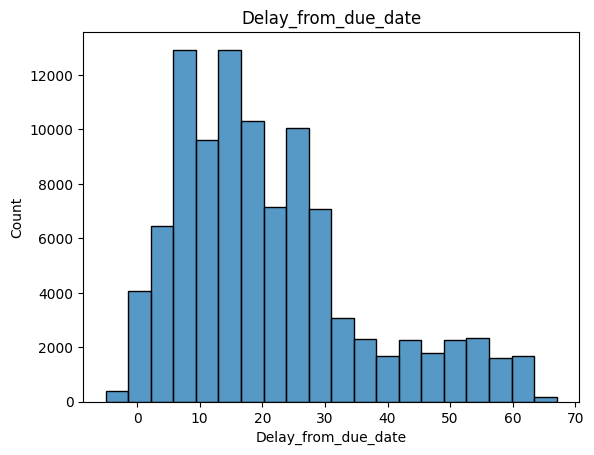

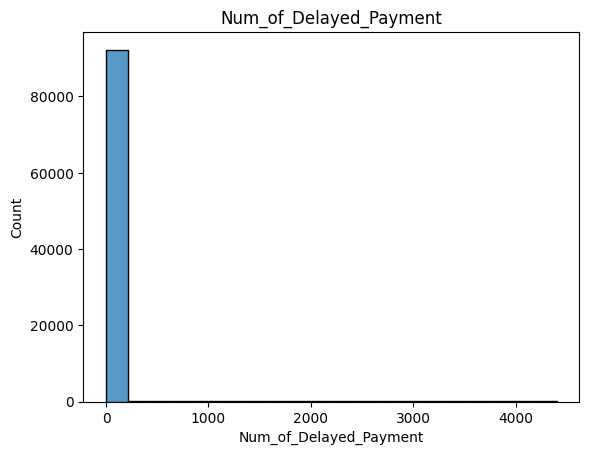

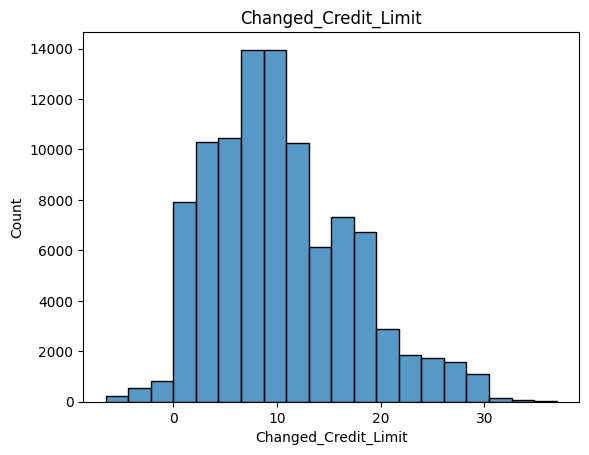

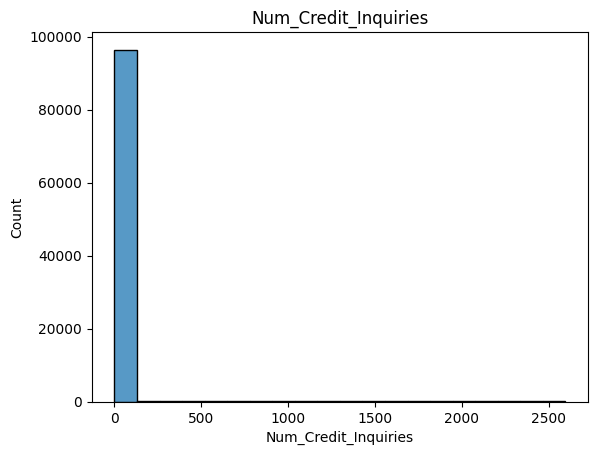

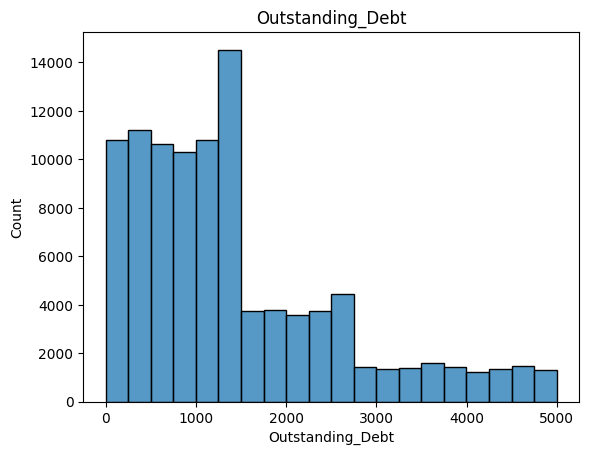

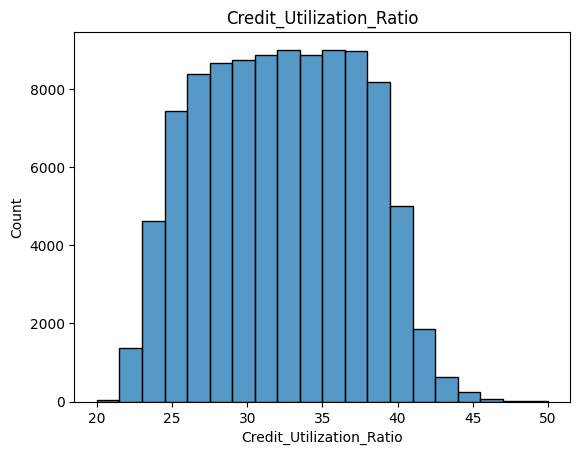

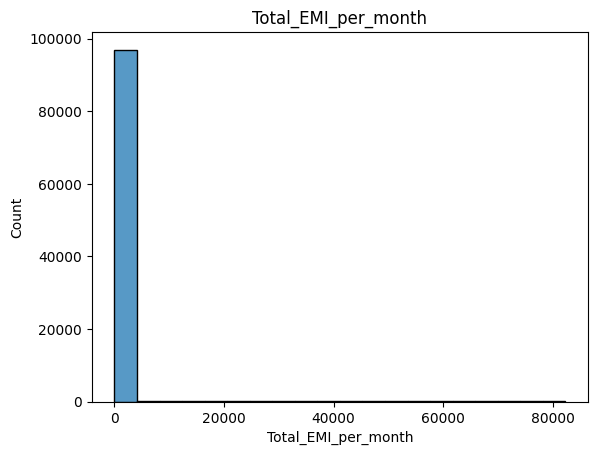

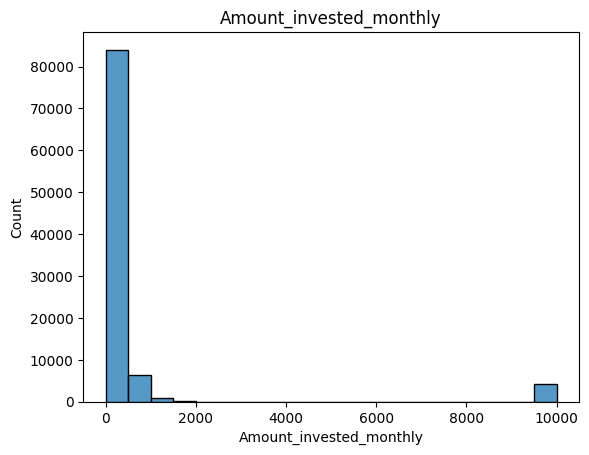

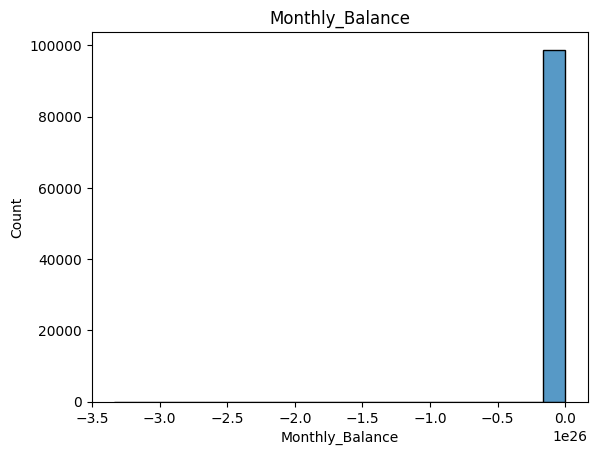

In [280]:
#Plotando histogramas para avaliar a distribuição

columns = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date',
            'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month',
            'Amount_invested_monthly','Monthly_Balance']


for col in columns:
    sns.histplot(data=df_pre_trat,x=col, bins=20)
    plt.title(f'{col}')
    plt.show()

##### A partir da visualização dos histogramos podemos notar comportamentos de distrubuições normais e deslocadas
##### Além disso, é visualmente perceptível a presença de outliers
##### OBS: Os outliers serão melhor observados nos boxplots a seguir

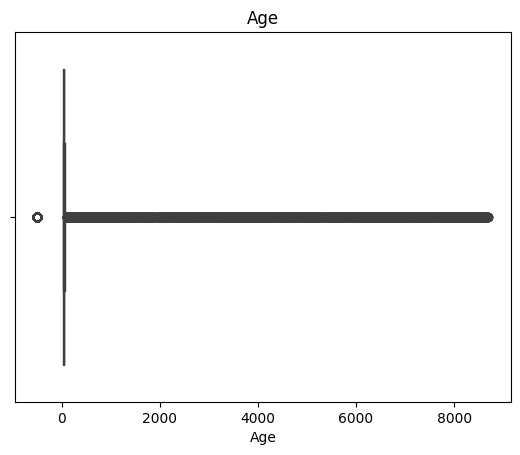

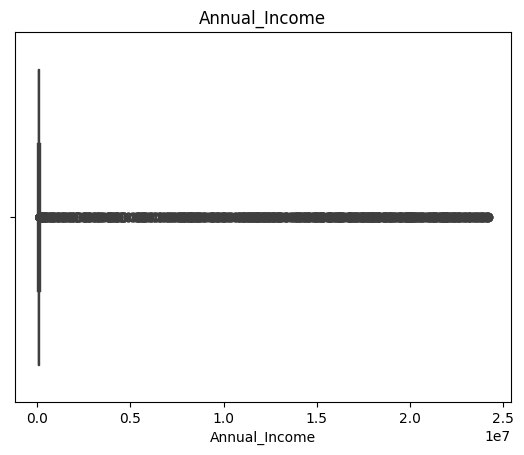

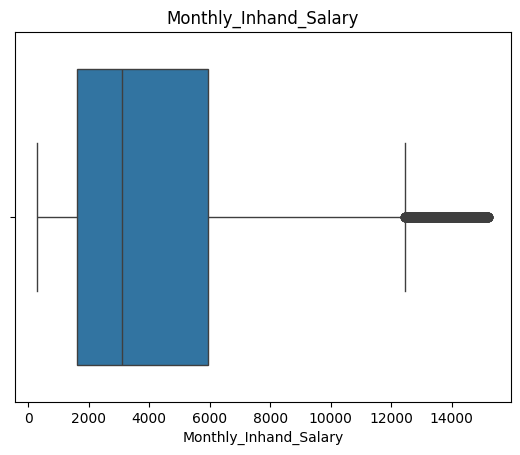

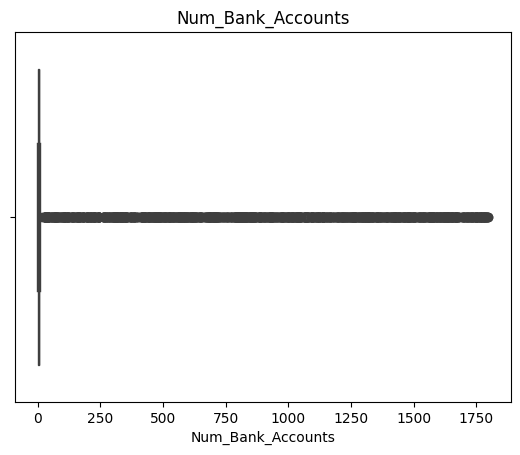

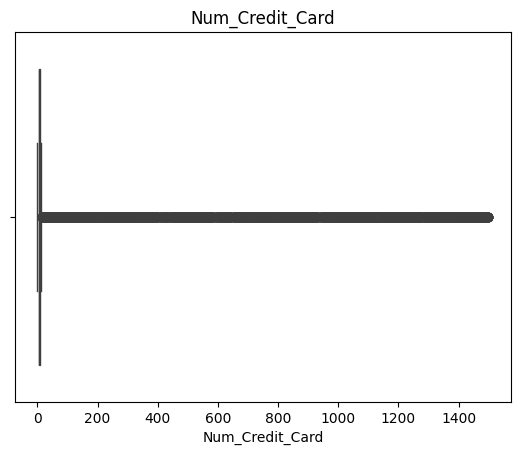

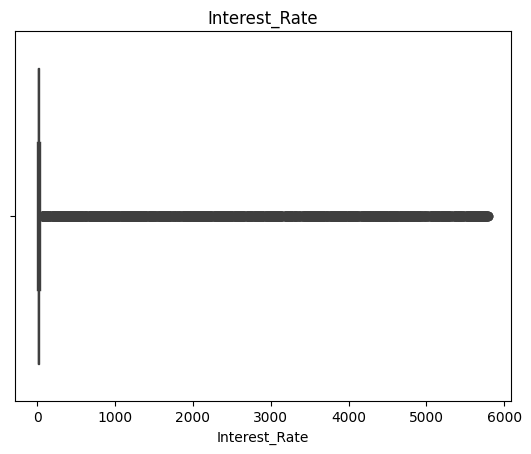

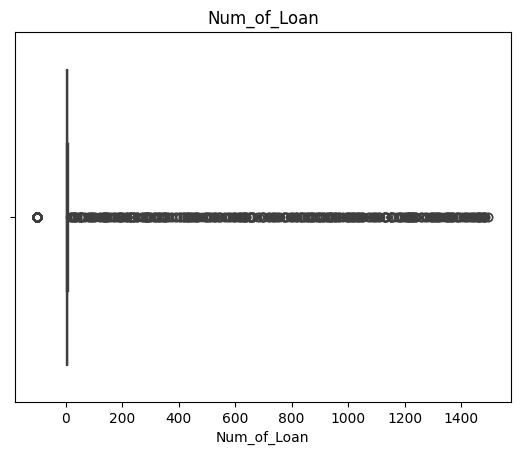

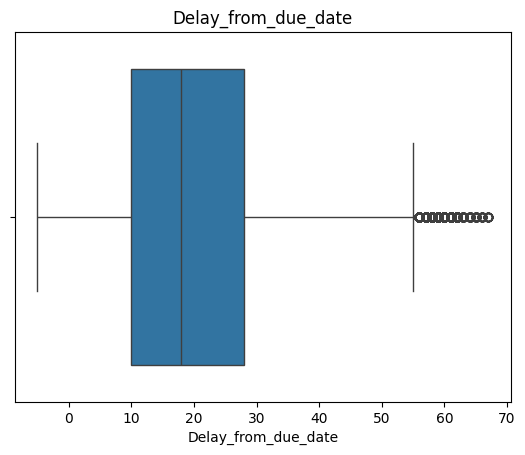

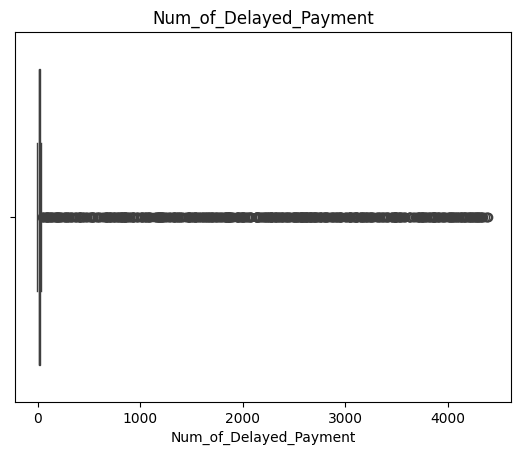

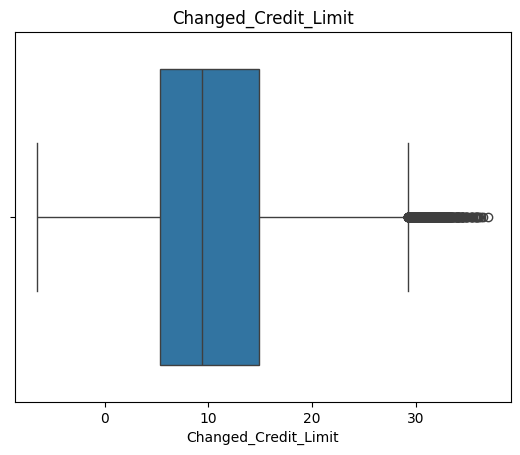

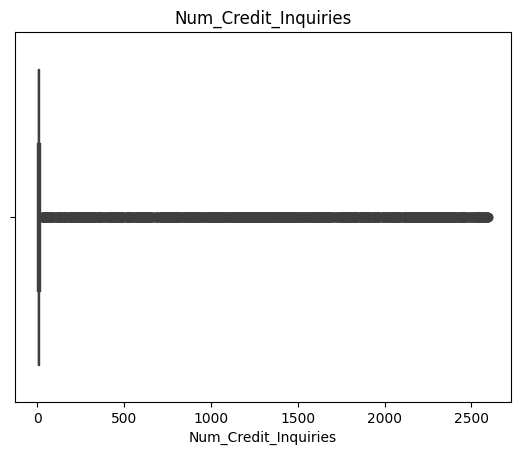

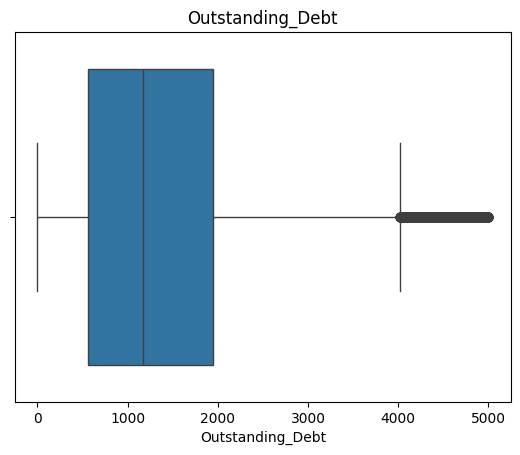

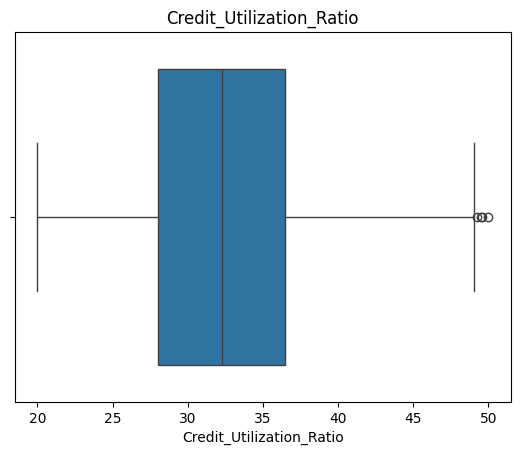

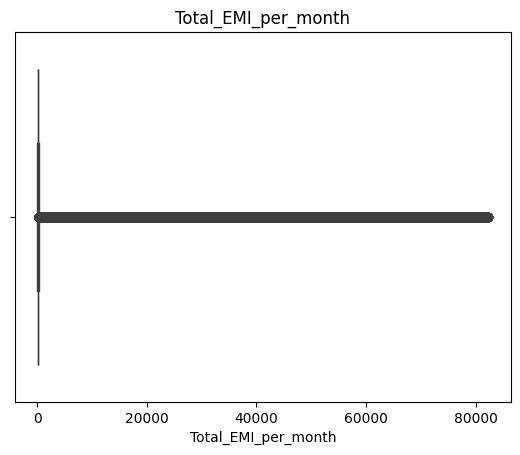

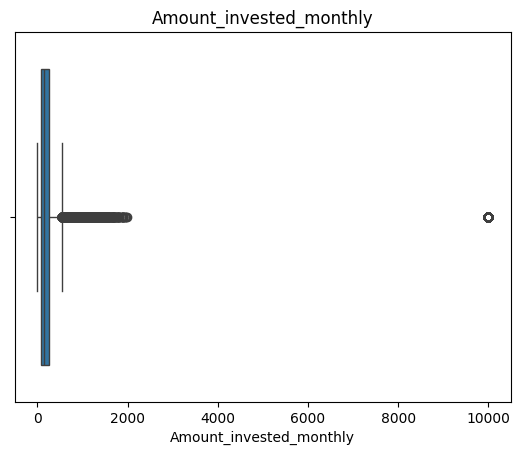

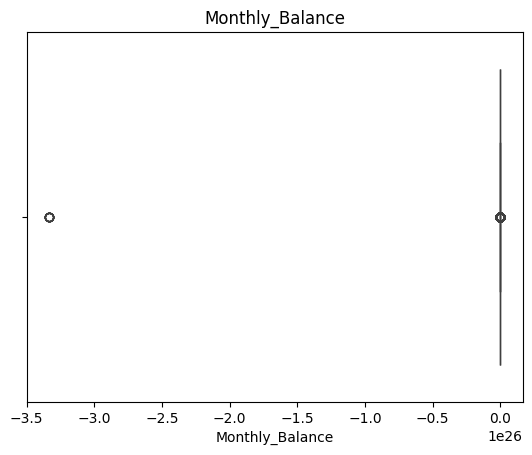

In [281]:
#Observando a presença de Outliers

for col in columns:
    sns.boxplot(data=df_pre_trat,x=col)
    plt.title(f'{col}')
    plt.show()

##### Podemos concluir a partir dos boxplots que todas as colunas numéricas possuem outliers, porém se faz sentido mante-los ou não será discutido na etapa de Data Cleaning.

##### A seguir irei explorar visualmente a distribuição dos dados categóricos 

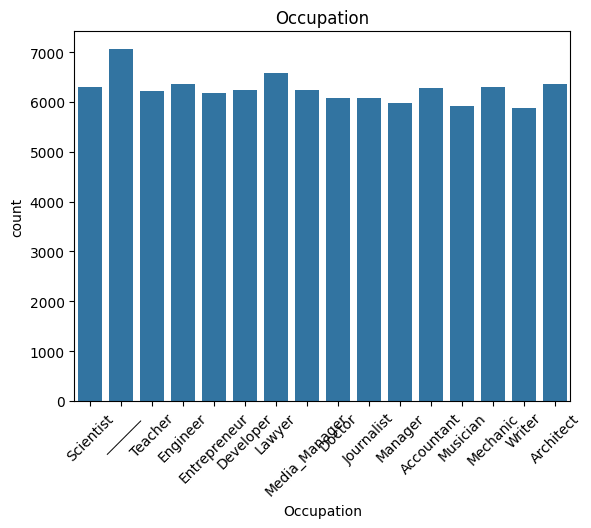

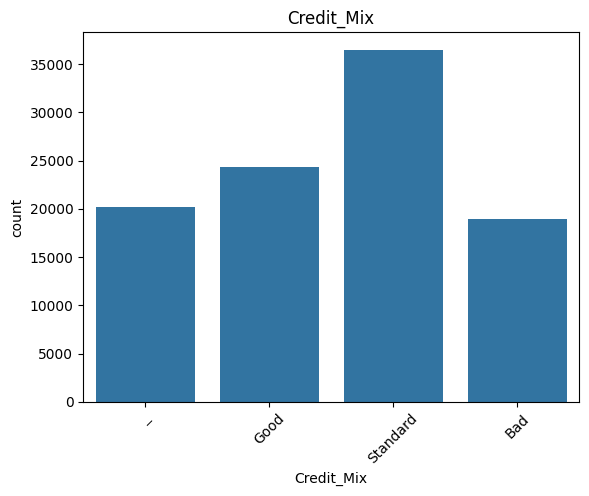

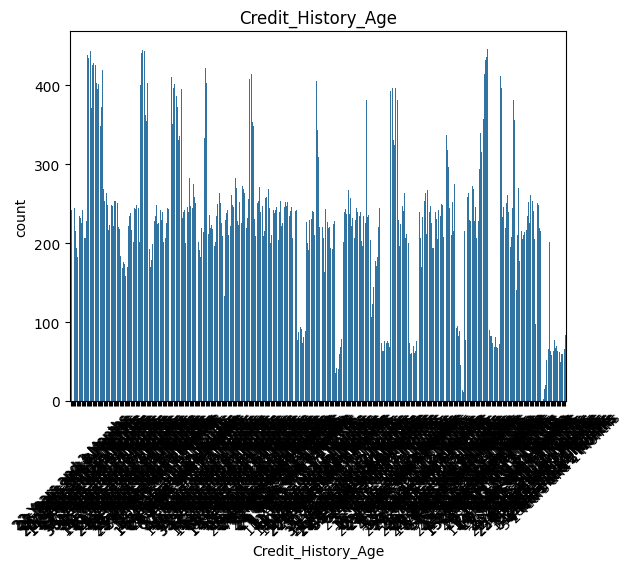

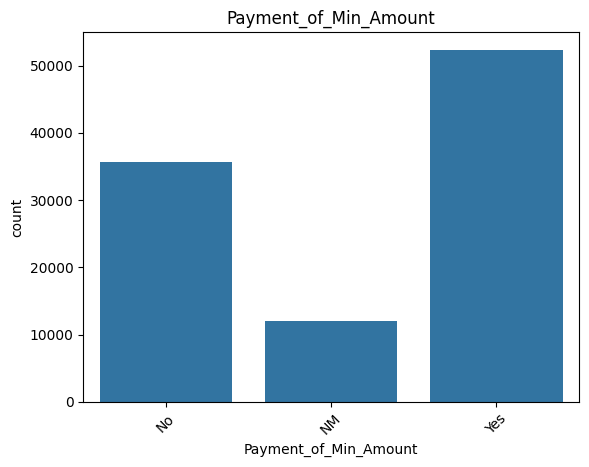

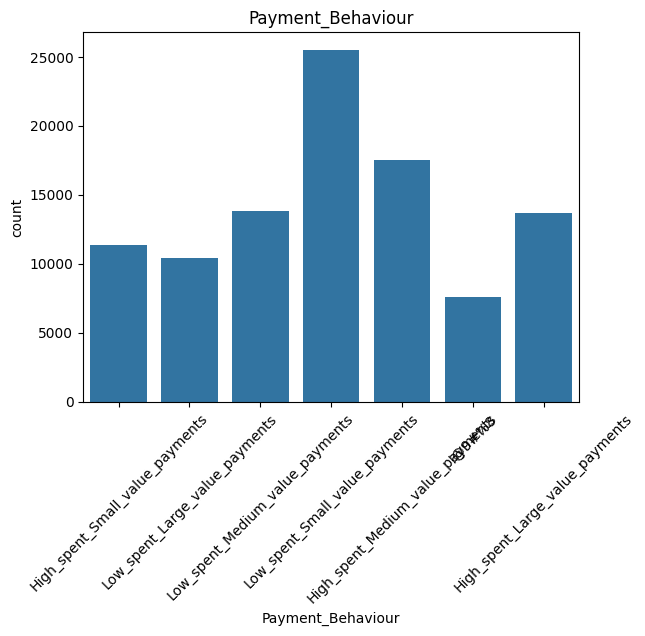

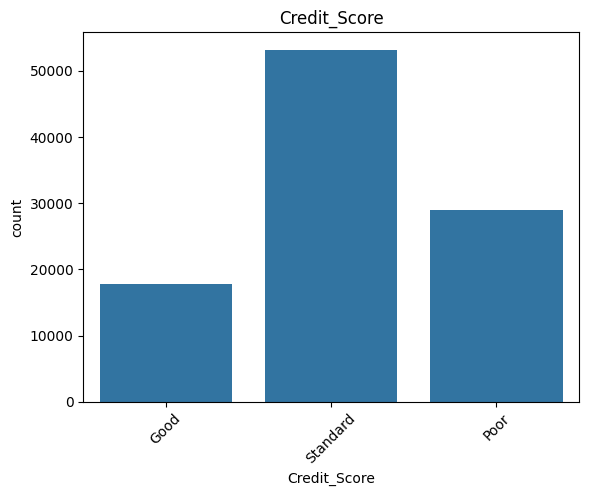

In [282]:
#columns_categ = ['Occupation','Type_of_Loan','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

columns_categ = ['Occupation','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

for col in columns_categ:
    plt.title(f'{col}')
    sns.countplot(data=df_pre_trat, x=col)
    plt.xticks(rotation=45)
    plt.show()

In [283]:
#A coluna Type_of_Loan foi comentada devido à grande quantidade de dados únicos que prejudicavam a visualização dos dados

# col = 'Type_of_Loan'

# plt.title(f'{col}')
# sns.barplot(data=df_pre_trat[f'{col}'])
# plt.show()

##### É possível observar que o target está desbalanceado, existe mais resultados Standard que os demais. O modelo pode obter resultados tendenciosos, por tanto será tratado em etapas posteriores.
##### Ocuppation, payment_behaviour, payment_of_min_amount e credi mix aparentam ter desvios das regras de negócio.
##### OBS: Credit_History_Age precisa de um pré tratamento para melhor visualização dos dados, que será feito a seguir.

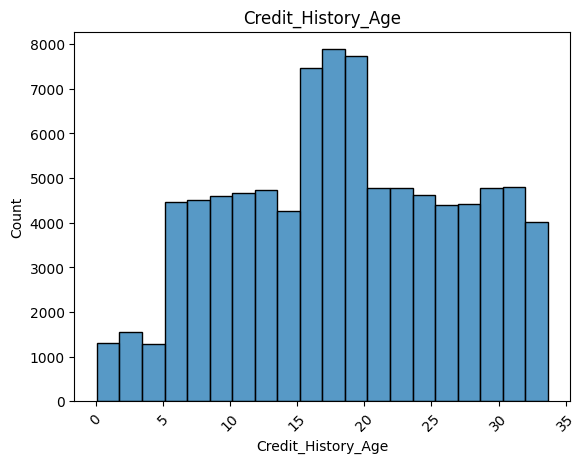

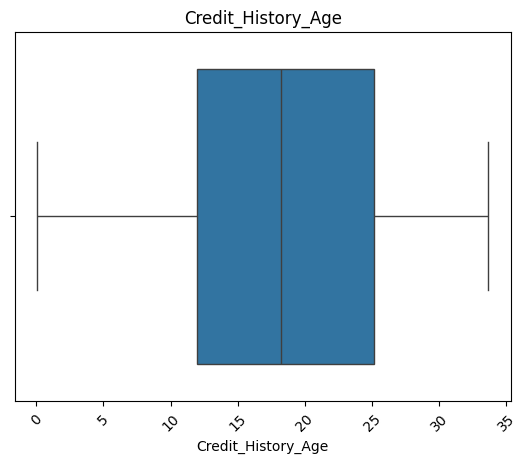

In [284]:
#Para melhor visualização, os dados foram convertidos da estrutura "17 Years and 9 Months" para "17,75"



def converter_para_decimal(texto): #Função responsável por converter os dados
    partes = texto.split(" Years and ")

    anos_str = partes[0]
    anos = int(anos_str) if anos_str != 'nan' else 1111111111 #Valor absurdo apenas para passar pelo tratamento, posteriormente os nulos (agora 1111111111) serão tratados no Data Cleaning

    meses_str = '0'
    
    if len(partes) > 1: #Necessário verificar em quantas partes a colunas foi dividida, pois em alguns casos há nan
        meses_str = partes[1].split(" Months")[0]

    meses = int(meses_str) if meses_str != 'nan' else 1111111111
    return anos + meses / 12.0


df_pre_trat['Credit_History_Age'] = df_pre_trat['Credit_History_Age'].astype(str)
df_pre_trat['Credit_History_Age'] = df_pre_trat['Credit_History_Age'].apply(converter_para_decimal)

df_pre_trat_Credit_History_Age = df_pre_trat.copy()
df_pre_trat_Credit_History_Age = df_pre_trat_Credit_History_Age.loc[df_pre_trat_Credit_History_Age['Credit_History_Age'] < 1111111111]

plt.title('Credit_History_Age')
sns.histplot(data=df_pre_trat_Credit_History_Age, x='Credit_History_Age',bins=20)
plt.xticks(rotation=45)
plt.show()

plt.title('Credit_History_Age')
sns.boxplot(data=df_pre_trat_Credit_History_Age, x='Credit_History_Age')
plt.xticks(rotation=45)
plt.show()

In [285]:
df_pre_trat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

##### Diferente dos demais dados númericos, Credit_History_Age é o único que não possui outliers e é praticamente uniformemente distribuido.

## Data Cleaning

##### Colunas como ID, Customer_ID, Name e SSN contém informações que não permitem encontrar um padrão, visto que são únicas (ou com baixa repetição). Dessa forma, serão removidos do dataset.

In [286]:
#Remoção das colunas que inviabilizam o treinamento
df_clean = df_pre_trat.copy()

df_clean = df_clean.drop(columns=['ID','Customer_ID','Name','SSN'])

df_clean.shape

(100000, 24)

##### A seguir estão os tratamento de outliers, campos vazios e dados que fogem da regra de negócio

In [287]:
#Criando uma funções para serem aproveitadaa em mais de uma coluna

#Tratamento de outliers
def limit_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_sem_outliers = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

    return df_sem_outliers

#Tratamento de valores nulos de colunas numéricas (Uso da mediana)
def replace_null_by_median(df,col):
    median = df[col].median()    
    df[col] = df[col].fillna(median)

    return df

#Tratamento de valores nulos de colunas categóricas (Uso da moda)
def replace_null_by_mode(df,col):
    
    values_without_nan = df[df[col].isna() == False] #Para evitar que nan seja a moda
    
    moda = values_without_nan[col].mode()[0]

    df[col] = df[col].fillna(moda)

    return df



In [288]:
#Tratando coluna Age

#Remoção de outliers, há valores negativos e e exorbitantes que não fazem sentido
df_clean = limit_outliers(df=df_clean,col='Age')

In [289]:
#Tratando coluna Occupation

#Os dados descritos como "_______" serão consideradas pessoas desempregadas
df_clean.loc[df_clean['Occupation'] == '_______','Occupation'] = 'Unemployed'

df_clean['Occupation'].unique()


array(['Scientist', 'Unemployed', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [290]:
#Tratando a coluna Annual_Income

#Embora haja outliers, o mesmo não significa que é um dado com alguma espécie de erro, mas sim uma pessoa capital alto, portanto será mantido


In [291]:
#Tratando a coluna Monthly_Inhand_Salary

#A renda mensal das pessoas possuem valores nulos, porem na coluna renda anual não há valores nulos, por tanto nesses casos a renda mensal será uma aproximação da anual dividida por 12
df_clean.loc[df_clean['Monthly_Inhand_Salary'].isna() == True,'Monthly_Inhand_Salary'] = df_clean['Annual_Income']/12

#Aqui não serão removidos os outliers, pela mesma justificativa anterior.


In [292]:
# Tratando a coluna Num_Bank_Accounts

#Não faz sentido os valores negativos de quantidade de contas, portanto serão eliminados.
df_clean = df_clean[df_clean['Num_Bank_Accounts'] >= 0]

#Existem pessoas com quantidades exorbitantes de contas, o que não faz sentido. Dessaa forma, os outeliers serão removidos.
df_clean = limit_outliers(df=df_clean,col='Num_Bank_Accounts')

In [293]:
#Tratando a coluna Num_Credit_Card

#Mesmas considerações feitas para a quantidade de contas bancárias

df_clean = df_clean[df_clean['Num_Credit_Card'] >= 0]

df_clean = limit_outliers(df=df_clean,col='Num_Credit_Card')


In [294]:
#Tratando a coluna Interest_Rate

#Não serão removidos os outliers pois os dados podem ser verdadeiros, uma vez que pode existir pessoas individadas



In [295]:
#Tratando a coluna Num_of_Loan

#Não faz sentido haver quantidade negativa de empréstimos
df_clean = df_clean[df_clean['Num_of_Loan'] >= 0]

#Remoção dos outliers, visto que em alguns casos a quantidade de empréstimos que uma pessoa é exorbitante, o que não faz sentido já que é algo limitado
df_clean = limit_outliers(df=df_clean,col='Num_of_Loan')

In [296]:
#Tratamento da coluna Type_of_Loan

#Os dados nulos serão preenchidos pela pela moda
df_clean = replace_null_by_mode(df=df_clean,col='Type_of_Loan') 

In [297]:
#Tratamento da coluna Delay_from_due_date

#Não faz sentido valores negativos
df_clean = df_clean[df_clean['Delay_from_due_date'] >= 0]

#Remoção dos outliers não se faz necessária, uma vez que realmente existem pessoas que possuem dívidas em processo


In [298]:
#Tratamento da coluna Num_of_Delayed_Payment

#Nesta coluna existem valores nulos. Neste caso serão preenchidos com a mediana, uma vez que sofre menor influência de outliers
df_clean = replace_null_by_median(df=df_clean,col='Num_of_Delayed_Payment') 

#Remoção dos outliers não se faz necessária, visto que é possível que pessoas estejam a muito tempo em dívida


In [299]:
#Tratamento da coluna Changed_Credit_Limit

#Substituindo nulos pela mediana
df_clean = replace_null_by_median(df=df_clean,col='Changed_Credit_Limit') 

#Não serão removidos os outliers por haver a possibilidade de aumentos especiais no crédito


In [300]:
#Tratamento da coluna Num_Credit_Inquiries

#Substituindo nulos pela mediana
df_clean = replace_null_by_median(df=df_clean,col='Num_Credit_Inquiries') 

#Remoção dos outliers. 
#Sob a ótica que essas consultas são feitas pelo banco e com o intuito de avaliar aumento do crédito, quantidades de consultas exorbitantes não fazem sentido.
df_clean = limit_outliers(df=df_clean,col='Num_Credit_Inquiries')

In [301]:
#Tratamento da coluna Credit_Mix

#A coluns Credit_Mix possui um dado chamado "_" que pode ser um cliente sem classificação de crédito, dessa forma será mantido, apenas modificado o nome
df_clean.loc[df_clean['Credit_Mix'] == '_','Credit_Mix'] = 'Without_Classification'


In [302]:
#Tratamento da coluna Outstanding_Debt

#Não será feita a remoção dos outliers, pois faz sentido que clientes tenham grandes dívidas a serem pagas e não apenas um erro.


In [303]:
#Tratando a coluna Credit_Utilization_Ratio

#Remoção dos outliers não necessária, pois é uma variável que varia de perfil de cliente, não necessariamente um erro


In [304]:
#Tratamento da coluna Credit_History_Age

#Como visto anteriormente, esta coluna não possui outliers ou valores que não façam sentido (como negativos).
#O único tratamento a ser feito é substituir os valores nulo (agora 1111111111) pela mediana

df_without_pre_trat = df_clean[df_clean['Credit_History_Age'] < 1111111111]
median = df_without_pre_trat['Credit_History_Age'].median()    

df_clean.loc[df_clean['Credit_History_Age'] >= 1111111111,'Credit_History_Age'] = median

In [305]:
#Tratamento da coluna Payment_of_Min_Amount

#A coluna Payment_of_Min_Amount possui dados classificados como "NM". Aqui será assumido "NM" como pessoas que não possuem parcelas a serem pagas, dessa forma não há
#A necessidade de tratamento por estar aparentemente dentro da regra de negócio.

In [306]:
#Tratamento da coluna Total_EMI_per_month

#Embora haja outilers faz sentido haver pessoas que devam mais, da mesma forma que um tipo de cliente pode pegar um grande emprestimo.


In [307]:
#Tratamento da coluna Amount_invested_monthly

#Variável que depende do perfil do cliente, não necessariamente os outliers se tratam de um erro.


#Substituindo nulos pela mediana
df_clean = replace_null_by_median(df=df_clean,col='Amount_invested_monthly')  

In [308]:
#Tratamento da coluna Payment_Behaviour

# Nesta coluna existem dados como '!@9#%8', no entanto é claro que se trata de uma fulga da regra de negócio, visto que as classficações a seguir fazem sentido entre si.
# 'High_spent_Small_value_payments' e 'Low_spent_Small_value_payments'
# 'High_spent_Medium_value_payments' e 'Low_spent_Medium_value_payments'
# 'High_spent_Large_value_payments' e 'Low_spent_Large_value_payments'

#Portanto os dados '!@9#%8' será substituido pela moda

values_without_error = df_clean[df_clean['Payment_Behaviour'] != '!@9#%8' ]
    
moda = values_without_error['Payment_Behaviour'].mode()[0]

df_clean.loc[df_clean['Payment_Behaviour'] == '!@9#%8','Payment_Behaviour'] = moda

In [309]:
#Tratamento da coluna Monthly_Balance

#Variável com outliers, mas que não necessariamente é um erro, mas sim cliente com alto rendimento


#Os valores nulos do balanço mensal podem ser aproximados atráves dos dados de entrada e saída, portanto:
df_clean.loc[df_clean['Monthly_Balance'].isna() == True,'Monthly_Balance'] = df_clean['Monthly_Inhand_Salary'] - df_clean['Total_EMI_per_month']

#O valor mensal investido não foi considerado, uma vez que ele está incluso no salário mensal do cliente. Caso fosse o juros do valor investido seria considerado como acréscimo.

## Answearing the Quetions

#### O case trata-se de um problema de classificação, uma vez que o enunciado se refere à necessidade de "um sistema inteligente para segregar as pessoas". Serão utilizados dois métodos, a árvore de decisão e random forest.

#### Desenvolvimento do Modelo

In [310]:
#As variáveis catergóricas precisam ser transformadas em valores numéricos para que o modelo perfome bem, portanto:
df_model = df_clean.copy()

columns = ['Month','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

label_encoders = {}

for col in columns:
    label_encoder = LabelEncoder()
    df_model[col] = label_encoder.fit_transform(df_model[col])
    label_encoders[col] = label_encoder
    

In [311]:
#Os valores numéricos precisam ser normalizados afim de reduzir fortes tendências no target
columns = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
            'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
            'Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

standard_scalers = {}

for col in columns:
    scaler = StandardScaler()
    df_model[col] = scaler.fit_transform(df_model[[col]])
    standard_scalers[col] = scaler   

In [312]:
#Visualização da base pronta para o treinamento
df_model.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,-0.955648,12,-0.110047,-0.085853,-0.924617,-0.747844,-0.149272,0.185486,128,...,3,-0.537271,-1.067648,0.467385,1,-0.163426,-0.266875,2,0.010134,Good
3,0,-0.955648,12,-0.110047,-0.090978,-0.924617,-0.747844,-0.149272,0.185486,128,...,1,-0.537271,-0.177326,0.498918,1,-0.163426,-0.207196,5,0.010134,Good
4,7,-0.955648,12,-0.110047,-0.085853,-0.924617,-0.747844,-0.149272,0.185486,128,...,1,-0.537271,-1.463488,0.509428,1,-0.163426,-0.286424,1,0.010134,Good
5,5,-0.955648,12,-0.110047,-0.090978,-0.924617,-0.747844,-0.149272,0.185486,128,...,1,-0.537271,-0.981721,0.519939,1,-0.163426,-0.275891,5,0.010134,Good
6,4,-0.955648,12,-0.110047,-0.085853,-0.924617,-0.747844,-0.149272,0.185486,128,...,1,-0.537271,-1.905156,0.530450,1,-0.163426,-0.217781,5,0.010134,Good


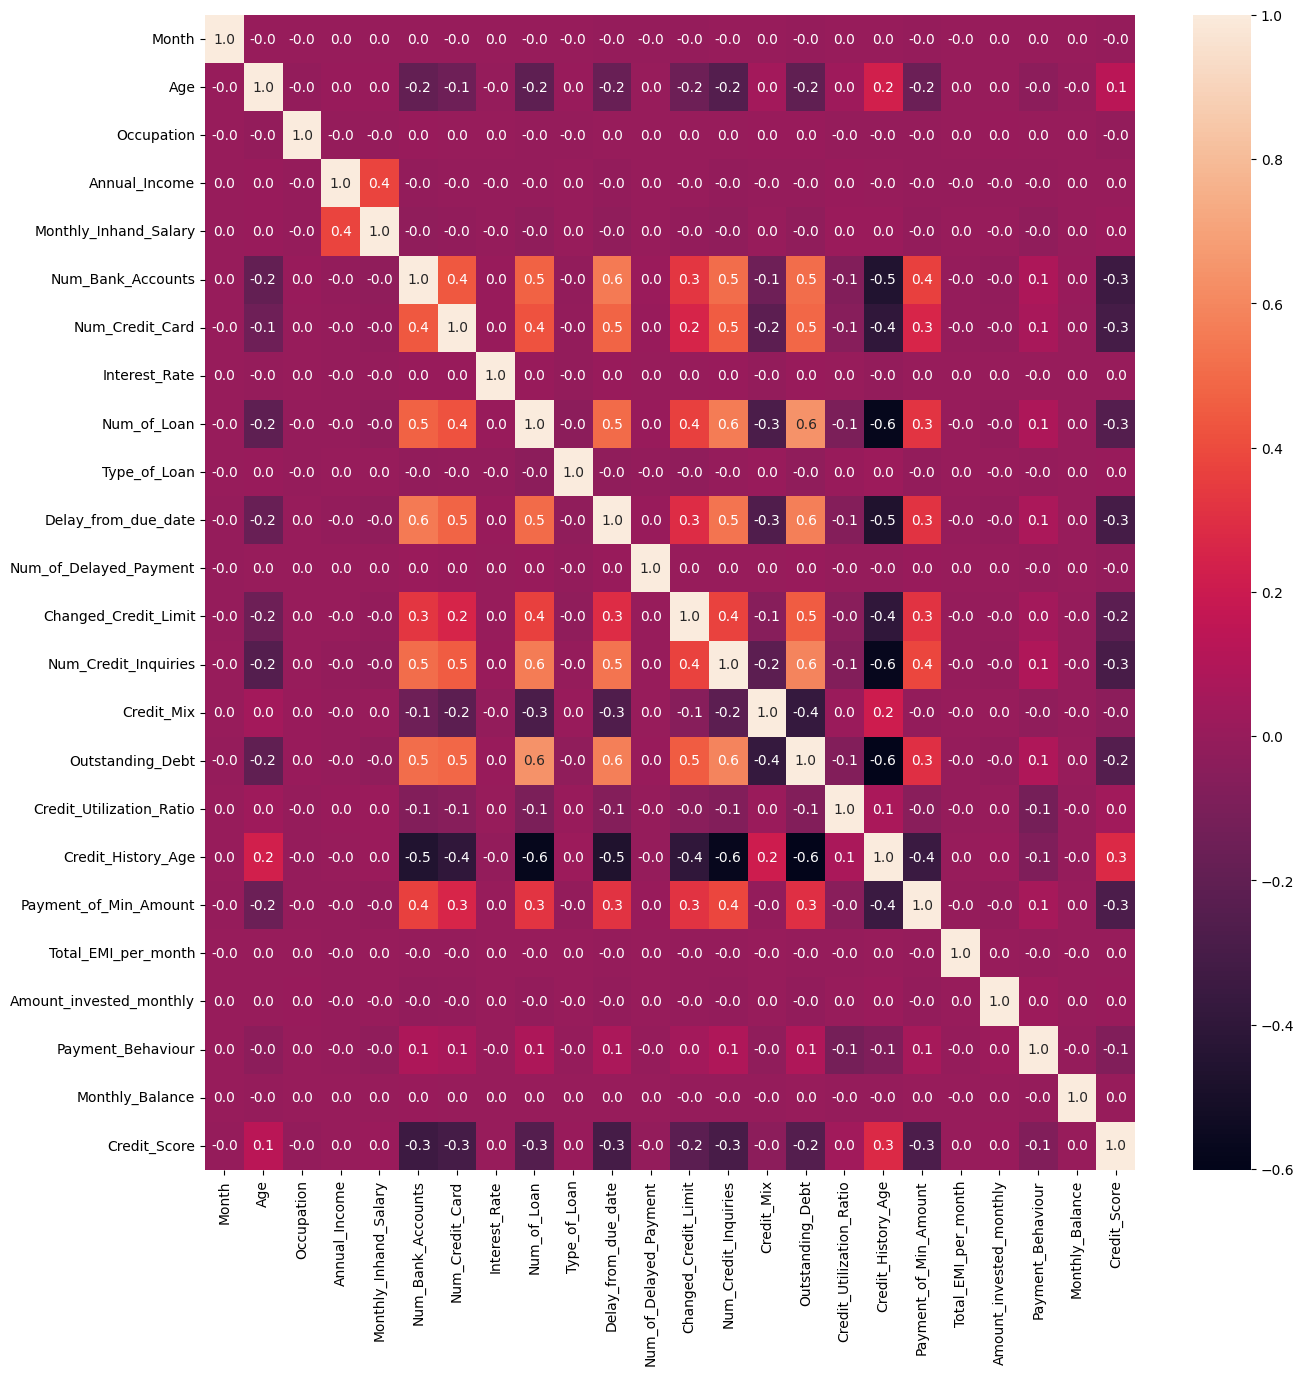

In [313]:
#Avaliando relação entre as features
df_corr = df_model.copy()

df_corr.loc[df_corr['Credit_Score'] == 'Poor','Credit_Score'] = 1
df_corr.loc[df_corr['Credit_Score'] == 'Standard','Credit_Score'] = 1.5
df_corr.loc[df_corr['Credit_Score'] == 'Good','Credit_Score'] = 2

df_corr['Credit_Score'] = df_corr['Credit_Score'].astype(int)

correlation = df_corr.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, fmt=".1f")
plt.show()

In [314]:
# Das colunas com relação igual ou superior a moderada (>=0.5) será mantida apenas uma, portanto as novas features são:
# Num_Credit_Inquiries: Quanto mais idade o cartão faz sentido ter mais dívidas
# Changed_Credit_Limit: Pessoas com menos dívidas podem receber mais créditos
# Credit_History_Age: É uma variável que por si só não influencia o Target. A pontuação do score depende mais do que houve nesse tempo de existência
# Outstanding_Debt: A divida a ser paga depende do tempo, uma vez que há o acréscimo dos juros
# Num_of_Loan: Pessoas com mais contas bancárias possuem um laque de tipos de empréstimo maior
# Delay_from_due_date: Clientes com mais de uma conta bancária e cartão de crádito atrasam mais no pagamento

col_out = ['Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age','Outstanding_Debt','Num_of_Loan','Delay_from_due_date']

col_features = ['Month','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Age',
            'Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
            'Num_of_Delayed_Payment','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

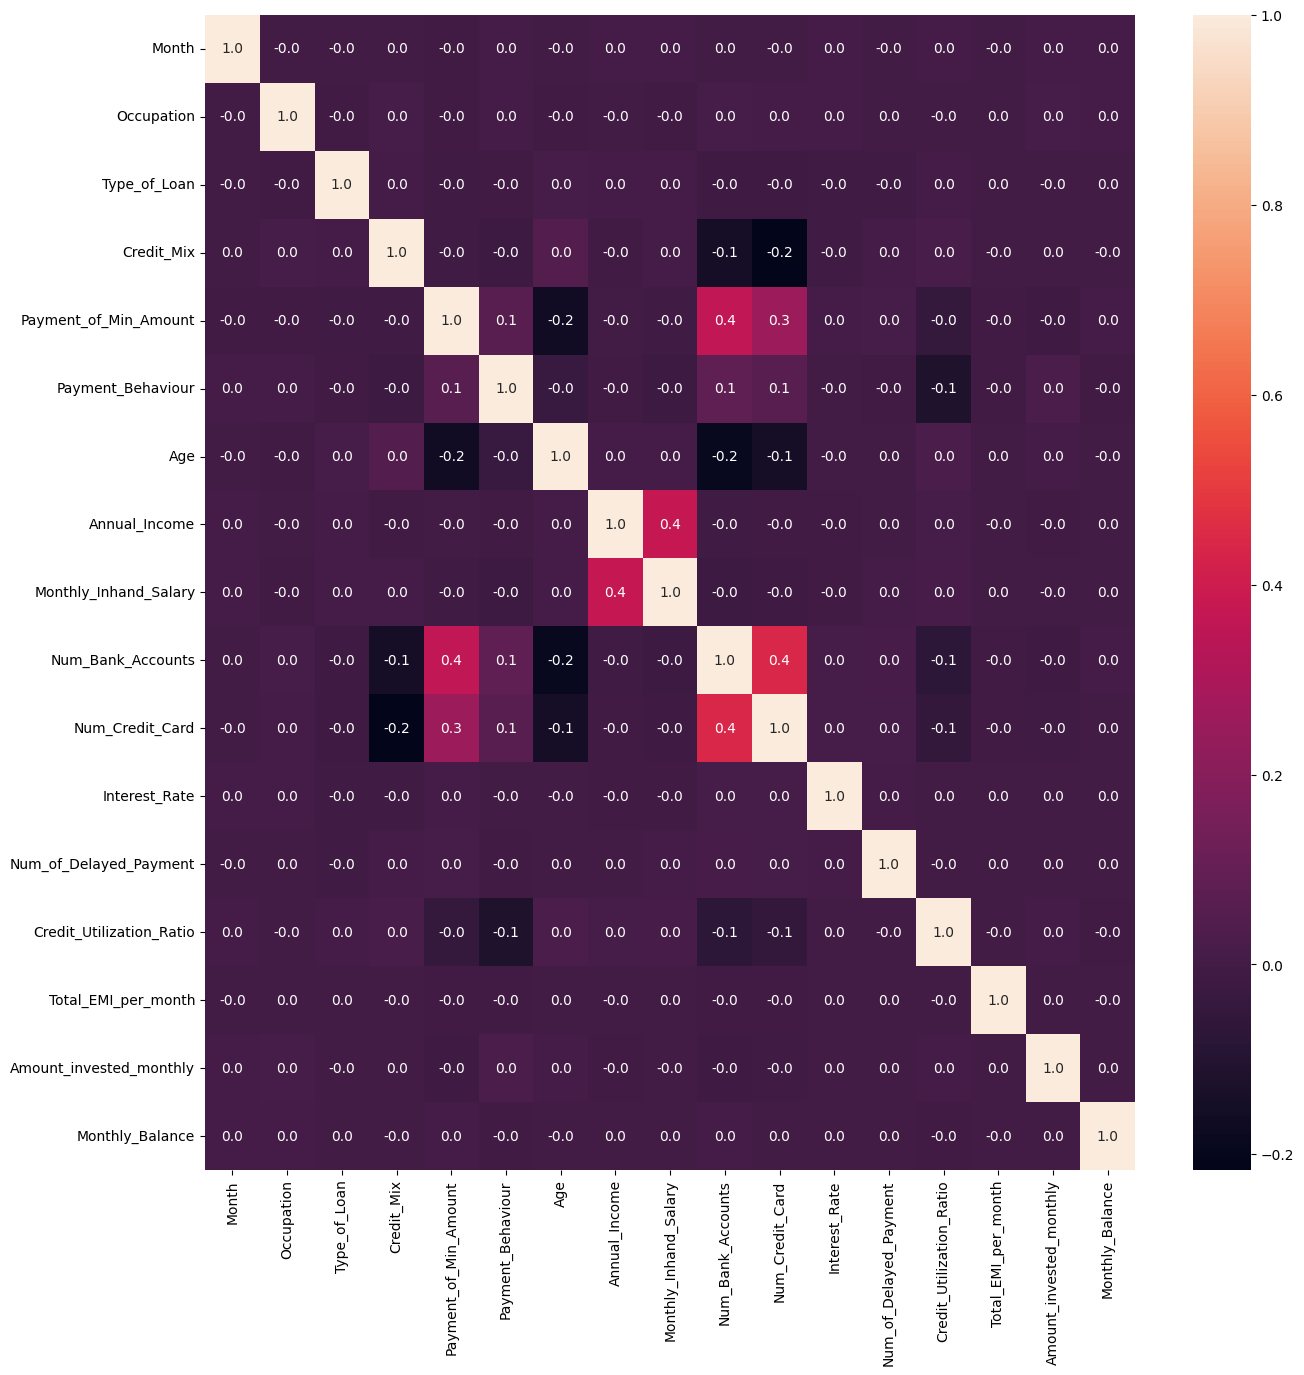

In [315]:
#Correlação entre as novas features
df_model_X = df_model.copy()
df_model_X_ = df_model_X.drop(columns=['Credit_Score'])


correlation = df_model_X[col_features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, fmt=".1f")
plt.show()


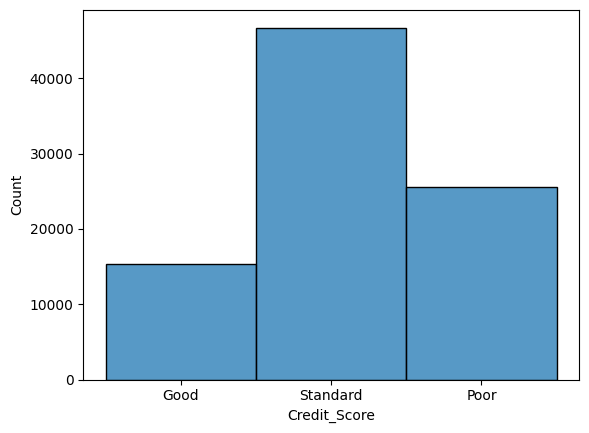

In [316]:
#Avaliando distribuição do Target
sns.histplot(data=df_clean,x='Credit_Score')
plt.show()

(45981, 24)


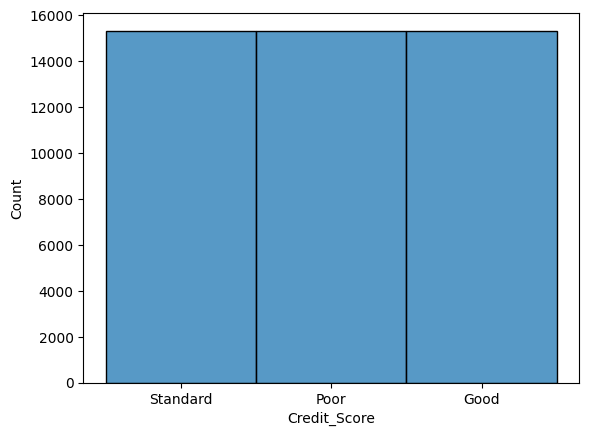

In [317]:
#Como o Target está está desbalanceado, será necessário realizar balancea-lo mas de prossguir com o trainamento do modelo

#A estratégia aqui adotada será o undersampling, a fim de utilizar apenas os dados do base, diferente do oversampling, que cria dados sintéticos.

target_ = 'Good'

dados_to_undersampling_Standard = df_model[df_model['Credit_Score'] == 'Standard']
dados_to_undersampling_Poor = df_model[df_model['Credit_Score'] == 'Poor']

dados_target_ = df_model[df_model['Credit_Score'] == target_]

tamanho_target_ = len(dados_target_['Credit_Score'].values)

dados_after_undersampling_Standard = resample(dados_to_undersampling_Standard,replace=False,n_samples=tamanho_target_,random_state=42)
dados_after_undersampling_Poor = resample(dados_to_undersampling_Poor,replace=False,n_samples=tamanho_target_,random_state=42)

dados_balanceados = pd.concat([dados_after_undersampling_Standard,dados_after_undersampling_Poor,dados_target_])

print(dados_balanceados.shape)

#Avaliando nova distribuição do Target
sns.histplot(data=dados_balanceados,x='Credit_Score')
plt.show()

In [318]:
# #Dividindo a base em traino e validação
# df_model_X = df_model.copy()
# df_model_X_ = df_model_X.drop(columns=['Credit_Score'])

# # X = df_model_X[col_features] -> Test realizado filtrando features e sem undersampling
# # y = df_model['Credit_Score']

# # X = df_model_X               -> Teste realizado sem filtrar features e sem undersampling
# # y = df_model['Credit_Score']


# X = dados_balanceados.drop(columns=['Credit_Score']) # -> Teste filtrando features e com undersampling
# X = dados_balanceados[col_features]
# y = dados_balanceados['Credit_Score']

X = dados_balanceados.drop(columns=['Credit_Score']) # -> Teste sem filtrar features e com undersampling (Melhor performance)
y = dados_balanceados['Credit_Score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

##### Testando Árvore de Decisão

In [319]:
#Criando o modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

#Realizando previsões com as features de validação
y_pred = modelo.predict(X_val)

In [320]:
#Avaliando Matrix confusão
matrix = confusion_matrix(y_true=y_val,y_pred=y_pred)
matrix

array([[3230,  358,  985],
       [ 359, 3179, 1015],
       [ 913, 1003, 2753]], dtype=int64)

In [321]:
#Avaliando F1 Score
score = f1_score(y_true=y_val,y_pred=y_pred,average='macro') # Para o cálculo das métricas doi utilizado o "macro", dessa forma a métrica seria uma média das métricas de cada Target.
score

0.6651472998798641

In [322]:
#Avaliando Recall
recall = recall_score(y_true=y_val,y_pred=y_pred,average='macro')
recall

0.6647248034570616

##### Testando RandomForest

In [323]:
#Criando o modelo
modelo_forest = RandomForestClassifier(random_state=42)
modelo_forest.fit(X_train, y_train)

#Realizando previsões com as features de validação
y_pred_forest = modelo_forest.predict(X_val)

In [324]:
#Avaliando Matrix confusão
matrix_forest = confusion_matrix(y_true=y_val,y_pred=y_pred_forest)
matrix_forest

array([[3914,   73,  586],
       [ 360, 3741,  452],
       [ 811,  860, 2998]], dtype=int64)

In [325]:
#Avaliando F1 Score
score_forest = f1_score(y_true=y_val,y_pred=y_pred_forest,average='macro')
score_forest

0.7700668088772256

In [326]:
#Avaliando Recall
recall_forest = recall_score(y_true=y_val,y_pred=y_pred_forest,average='macro')
recall_forest

0.7732189517692846

##### RandomForest demonstrou-se mais eficiente e forte correlação com o target (>0.7), portanto será utilizado para responder as questões a seguir
##### OBS: Foram testadas as features eliminando as correlacionadas e mantendo. Ao manter os resultados foram ligeiramente melhores (<5%).

In [327]:
#Visualização geral da influência das features sob o Target
influencia = modelo_forest.feature_importances_

#Imprimindo features e suas influências
feature_influencias = []

for feature, influencia in zip(X_train.columns, influencia):
    feature_influencias.append({'Features':feature,'Influência':influencia})

feature_influencias = pd.DataFrame(feature_influencias)
feature_influencias = feature_influencias.sort_values(by='Influência',ascending=False)
feature_influencias

,Features,Influência
15,Outstanding_Debt,0.104290
7,Interest_Rate,0.076704
10,Delay_from_due_date,0.072188
17,Credit_History_Age,0.057522
14,Credit_Mix,0.053589
12,Changed_Credit_Limit,0.052374
13,Num_Credit_Inquiries,0.049524
18,Payment_of_Min_Amount,0.049305
4,Monthly_Inhand_Salary,0.041153
19,Total_EMI_per_month,0.040648


#### 1.	O que faz alguém ter um score maior ou menor?



##### O score é influenciado pelas variáveis a seguir:

##### - Proporcional: idade do cliente, idade do histórico do cartão e comportamento de pagamento 
##### - Inversamente Proporcional: quantidade de contas bancárias, quantidade de cartões de crédito, quantidade de empréstimo, quantidade de dias de atraso para o pagamento, variação percentual do limite do cartão, quantidade de consultas no cartão, dívida restante a ser paga e o pagamento mínimo da parcela.

In [340]:
#Avaliando as categóricas para sustentar a análise acima
classe_Payment_Behaviour = label_encoders['Payment_Behaviour'].classes_
values_Payment_Behaviour = label_encoders['Payment_Behaviour'].transform(classe_Payment_Behaviour)

classe_Payment_Payment_of_Min_Amount = label_encoders['Payment_of_Min_Amount'].classes_
values_Payment_Payment_of_Min_Amount = label_encoders['Payment_of_Min_Amount'].transform(classe_Payment_Payment_of_Min_Amount)

print(f"---Avaliação da variáveis categóricas--- \nPayment_Behaviour  \nclasse:{classe_Payment_Behaviour} \nneew_values:{values_Payment_Behaviour}\n\nPayment_of_Min_Amount \nclasse:{classe_Payment_Payment_of_Min_Amount} \nneew_values:{values_Payment_Payment_of_Min_Amount}")

---Avaliação da variáveis categóricas--- 
Behaviour 
classe:['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'] 
neew_values:[0 1 2 3 4 5]

Payment_of_Min_Amount 
classe:['NM' 'No' 'Yes'] 
neew_values:[0 1 2]


#### 2.	A quantidade de empréstimos é relevante?


##### Não, está entre os cinco mais irrelevantes.

#### 3.	O saldo mensal é relevante?


##### Não, pelo contrário, é o que menos influencia o Target

#### 4.	Que tipos de clientes são mais propensos a ficarem inadimplentes? 


##### Os clientes mais propensos a ficarem inadimplentes são os que possuem maiores dívidas a serem pagas (Outstanding_Debt) e as variáveis que influencia positivamente essa variável são:
#####
##### - Quantidade de contas bancárias
##### - Quantidade de cartões de créditos
##### - Quantidade de empréstimos
##### - Quantidade de dias de atraso do pagamento do empréstimo
##### - Variação percentual no limite do cartão de crédito
##### - Quantidade de consultas de cartão de crédito
#####
##### Portanto, as pessoas mais provavéis de de ficarem inadimplentes são aquelas que possuem maiores quantidade de contas bancárias, cartões de créditos, empréstimos, dias de atraso do pagamento, variação do limite do cartão e consultas de cartão.

#### 5.	Qual informação mais influência no score?

##### A Coluna Outstanding_Debt (dívida restante a ser paga) é o que mais influencia o Score